!pip install openTSNE

!pip install umap-learn

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

from openTSNE import TSNE
from umap import UMAP
from sklearn import decomposition

/workspaces/DSML/DSLessons/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X = digits.data
Y = digits.target

In [5]:
X.shape

(1797, 64)

In [6]:
digits.images.shape

(1797, 8, 8)

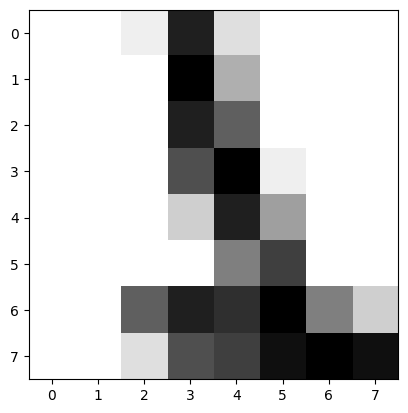

In [7]:
plt.gray()
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r)

In [8]:
#PCA
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z1 = pca_2D.transform(X)

In [9]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

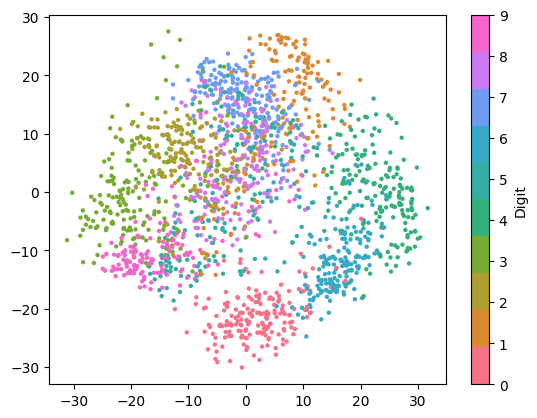

In [10]:
fig, ax = plt.subplots()
im = ax.scatter(Z1[:,0], Z1[:,1], s=10, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [11]:
# tSNE
Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)

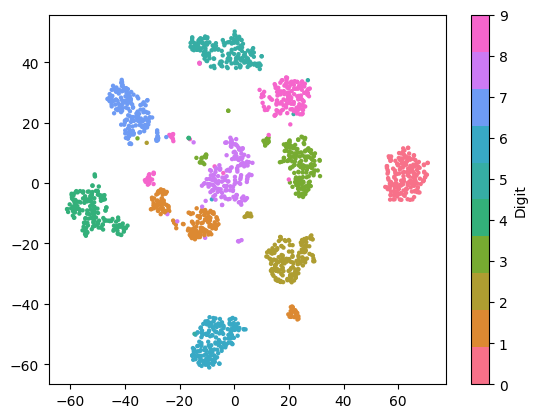

In [12]:
fig, ax = plt.subplots()
im = ax.scatter(Z2[:,0], Z2[:,1], s=10, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [13]:
%time
Z3 = UMAP(init='random', random_state=42).fit_transform(X)

CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 8.58 μs


/workspaces/DSML/DSLessons/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


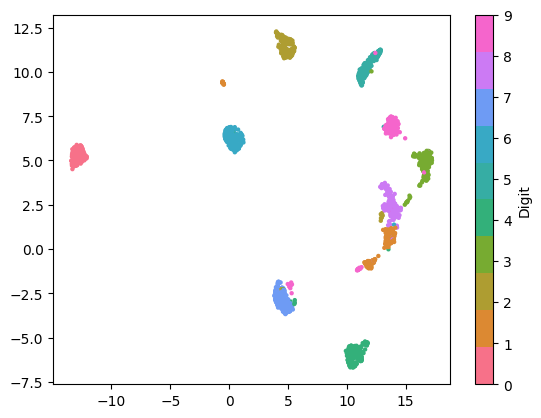

In [14]:
fig, ax = plt.subplots()
im = ax.scatter(Z3[:,0], Z3[:,1], s=10, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')